In [1]:
#Step1- Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#step2 Loading data
pupil = pd.read_csv("C:/Users/Syam7/OneDrive/My project/Final Data/9366_sdd_pupil_data_archive_2023.csv", low_memory=False)
teacher = pd.read_csv("C:/Users/Syam7/OneDrive/My project/Final Data/9366_sdd_teacher_data_archive_2023.csv", low_memory=False)
imd = pd.read_csv("C:/Users/Syam7/OneDrive/My project/Final Data/imd.csv", low_memory=False)

print("Datasets loaded successfully:")
print(f"Pupil shape   → {pupil.shape}")
print(f"Teacher shape → {teacher.shape}")
print(f"IMD shape     → {imd.shape}")

# Quick look at top rows
display(pupil.head(3))
display(teacher.head(3))
display(imd.head(3))


Datasets loaded successfully:
Pupil shape   → (17466, 657)
Teacher shape → (89, 64)
IMD shape     → (32844, 57)


,pseudo_pupilid,datayr,dgender,age1115,region,ethnicgp5,pupilwt,al4warg,al4wdam,al4wdedr,...,okdk1,okdkw,okec1,okecw,okvs1,okvsw,ownbed,returncode,truant,volunsch
0,6e52af795e432924ff13e1c8e1fa32059a193afc5490dc...,2023,2,13,8,1,1.284952,-1,-1,-1,...,2,2,2,2,2,2,1,9,2,0
1,9f6dd1020163cedca88636dbf4b11ab144ffbb0363d5d8...,2023,1,12,8,1,3.303929,-1,-1,-1,...,2,2,2,2,2,2,1,9,2,0
2,dbf2e4ff33424f6bf3810eacdc1e0200d96c6104434eb5...,2023,1,13,8,1,3.303929,-1,-1,-1,...,2,2,2,2,2,2,1,9,2,0


,pseudo_schoolid,edadvice,lesalc,lesdrg,lesnps,lessmok,lesvap,q10advic,q10assem,q10coun,...,y7smok,y7vap,y8alc,y8drg,y8smok,y8vap,y9alc,y9drg,y9smok,y9vap
0,f1bd51429c4e05eec690236a16e8abf76881841d79bb70...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,8db79621473ff369cccc9af1d40867e016ea7179398d6a...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,f3922cb2fa7d25311c31fc04588bffe9b33c6580254637...,2.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,...,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0


,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01000001,City of London 001A,E09000001,City of London,6.208,29199,9,0.007,32831,10,...,16364,5,1.503,1615,1,1296,175,656,465,715
1,E01000002,City of London 001B,E09000001,City of London,5.143,30379,10,0.034,29901,10,...,22676,7,1.196,2969,1,1156,182,580,394,620
2,E01000003,City of London 001C,E09000001,City of London,19.402,14915,5,0.086,18510,6,...,17318,6,2.207,162,1,1350,146,759,445,804


In [3]:
#step3 - Cleaning and standardisation of pupil & Imd data

## For PUPIL data ----
pupil.columns = pupil.columns.str.strip()

# Useful numeric coercions
if "datayr" in pupil.columns:
    pupil["datayr"] = pd.to_numeric(pupil["datayr"], errors="coerce")

beh_cols = [c for c in ("lssmk", "lsalc", "lsdrg") if c in pupil.columns]
for c in beh_cols:
    pupil[c] = pd.to_numeric(pupil[c], errors="coerce")
# Keep only 1 (Yes) or 2 (No), set all others to NaN
    pupil.loc[~pupil[c].isin([1, 2]), c] = np.nan
    
# Drop rows where behaviour is missing (NaN)
    pupil = pupil.dropna(subset=[c])
    
# Recode: 1 = Yes → 1, 2 = No → 0
    pupil[c] = pupil[c].map({1: 1, 2: 0})

print("✅ Behaviour columns cleaned and restricted to Yes/No only.")   
    

# Keep only essentials (age cleaned later in Step 4)
keep_pupil = [c for c in ("pseudo_pupilid", "datayr", "age1115") if c in pupil.columns] + beh_cols
pupil_clean = pupil[keep_pupil].copy()

print("pupil_clean:", pupil_clean.shape)


## For imd data ----
imd.columns = imd.columns.str.strip()
imd.rename(columns={
    "Index of Multiple Deprivation (IMD) Score": "imd_score",
    "Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)": "imd_rank",
    "Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)": "imd_decile",
    "LSOA code (2011)": "lsoa_code",
    "LSOA name (2011)": "lsoa_name",
    "Local Authority District code (2019)": "lad_code",
    "Local Authority District name (2019)": "lad_name",
}, inplace=True)

for c in ("imd_score", "imd_rank", "imd_decile"):
    if c in imd.columns:
        imd[c] = pd.to_numeric(imd[c], errors="coerce")

imd_clean = imd.dropna(subset=["imd_score"]).copy()
if "imd_decile" in imd_clean.columns:
    imd_clean.loc[~imd_clean["imd_decile"].between(1, 10), "imd_decile"] = np.nan

print("imd_clean:", imd_clean.shape)


✅ Behaviour columns cleaned and restricted to Yes/No only.
pupil_clean: (14836, 6)
imd_clean: (32844, 57)


In [4]:
##step4--Detecting and cleaning Age/gender columns

# cleaning Age -- Only keeping Age 11 - 15
src_age = "age1115" if "age1115" in pupil.columns else ("age1115" if "age1115" in pupil_clean.columns else None)
if src_age:
    pupil["age_clean"] = pd.to_numeric(pupil[src_age], errors="coerce")
    pupil.loc[~pupil["age_clean"].between(11, 15), "age_clean"] = np.nan
else:
    print(" age1115 not found; skipping age cleaning.")
  
# --- Gender label ---
gender_map = {1: "Male", 2: "Female", 3: "Other / Non-binary", 4: "Other / Non-binary", 5: "Prefer not to say"}
src_gender = "dgender" if "dgender" in pupil.columns else None
if src_gender:
    pupil["gender_label"] = pupil[src_gender].map(gender_map).fillna("Unknown")
else:
    print(" .gender not found; skipping gender mapping.")

# --- Refresh pupil_basic with new fields ---
beh_cols = [c for c in ("lssmk", "lsalc", "lsdrg") if c in pupil.columns]  
keep_pupil = [c for c in ("pseudo_pupilid", "datayr", "age_clean", "gender_label") if c in pupil.columns] + beh_cols
pupil_clean = pupil[keep_pupil].copy()

print("pupil_clean (after Step 4):", pupil_clean.shape)

pupil_clean (after Step 4): (14836, 7)


In [5]:
##step5 --Region codes to region name in pupil dataset
if "region" in pupil.columns:
    region_map = {
        1: "North East",
        2: "North West",
        3: "Yorkshire and The Humber",
        4: "East Midlands",
        5: "West Midlands",
        6: "East of England",
        7: "London",
        8: "South East",
        9: "South West"
    }

    # Creating readable region_name column
    pupil["region_name"] = pupil["region"].map(region_map).fillna("Unknown")

    # Refresh pupil_clean to include the new field
    keep_cols = [c for c in pupil_clean.columns] + ["region_name"]
    pupil_clean = pupil[keep_cols].copy()

    print("Region codes mapped successfully.")
    print(pupil["region_name"].value_counts(dropna=False))
else:
    print("No 'region' column found in pupil data — skipping region mapping.")

Region codes mapped successfully.
region_name
North West                  3108
South East                  1927
London                      1849
North East                  1703
Yorkshire and The Humber    1655
East of England             1463
West Midlands               1113
South West                  1032
East Midlands                986
Name: count, dtype: int64


In [6]:
##step6 -- Creating Region in Imd and merging with Pupil Dataset
  
    ##creating region with lad names
     
lad2region = pd.DataFrame({
    "lad_name": [
        "County Durham", "Manchester", "Leeds", "Nottingham",
        "Birmingham", "Cambridge", "London Borough of Camden",
        "Kent", "Bristol, City of", "Cornwall"
    ],
    "region_name": [
        "North East", "North West", "Yorkshire and The Humber", "East Midlands",
        "West Midlands", "East of England", "London",
        "South East", "South West", "South West"
    ]
})

lad2region.to_csv("lad_to_region_lookup.csv", index=False)
print("Created lad_to_region_lookup.csv")

# Merging lad2region in imd dataset
imd_clean = imd_clean.merge(lad2region, on="lad_name", how="left")

# Verify that region_name column is now attached
print("\nAfter merge — IMD columns:", imd_clean.columns.tolist())
print(imd_clean[["lad_name", "region_name"]].head(10))
print("\nUnique regions now present in IMD data:")
print(imd_clean["region_name"].value_counts(dropna=False))

Created lad_to_region_lookup.csv

After merge — IMD columns: ['lsoa_code', 'lsoa_name', 'lad_code', 'lad_name', 'imd_score', 'imd_rank', 'imd_decile', 'Income Score (rate)', 'Income Rank (where 1 is most deprived)', 'Income Decile (where 1 is most deprived 10% of LSOAs)', 'Employment Score (rate)', 'Employment Rank (where 1 is most deprived)', 'Employment Decile (where 1 is most deprived 10% of LSOAs)', 'Education, Skills and Training Score', 'Education, Skills and Training Rank (where 1 is most deprived)', 'Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)', 'Health Deprivation and Disability Score', 'Health Deprivation and Disability Rank (where 1 is most deprived)', 'Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs)', 'Crime Score', 'Crime Rank (where 1 is most deprived)', 'Crime Decile (where 1 is most deprived 10% of LSOAs)', 'Barriers to Housing and Services Score', 'Barriers to Housing and Services Rank (where 1 is most 

In [15]:
##step 6A ---Aggregating imd and merging imd with pupil data

#  Aggregate IMD metrics by region
imd_region_summary = (
    imd_clean
     .dropna(subset=["region_name"])         
    .groupby("region_name", dropna=False)
    .agg(
        mean_imd_score=("imd_score", "mean"),
        mean_imd_rank=("imd_rank", "mean"),
        share_decile_1=("imd_decile", lambda s: np.mean(s == 1)),
        share_decile_1_2=("imd_decile", lambda s: np.mean(s.isin([1, 2])))
    )
    .reset_index()
)

print("Regional IMD summary created:")
display(imd_region_summary.head(10))

#step6B--Merging with Pupil
if "region_name" not in pupil_clean.columns:
    raise KeyError("pupil_clean has no 'region_name'. Run Step 5 first.")

pupil_merged = pupil_clean.merge(imd_region_summary, on="region_name", how="left")

# step6c-- Quick check ---
print("\n Merged dataset shape:", pupil_merged.shape)
display(pupil_merged.head(5))

# step6d--- Save merged dataset ---
pupil_merged.to_csv("pupil_with_regional_imd.csv", index=False)
print(" Saved merged dataset → pupil_with_regional_imd.csv")

Regional IMD summary created:


,region_name,mean_imd_score,mean_imd_rank,share_decile_1,share_decile_1_2
0,East Midlands,35.731313,8024.010989,0.307692,0.571429
1,East of England,15.434217,19797.173913,0.000000,0.043478
2,North East,27.434944,12317.799383,0.120370,0.333333
3,North West,39.987039,6598.627660,0.432624,0.592199
4,South West,24.626939,13421.735144,0.098472,0.207131
5,West Midlands,37.608263,7752.449139,0.413146,0.563380
6,Yorkshire and The Humber,27.243361,14058.024896,0.236515,0.336100



 Merged dataset shape: (14836, 12)


,pseudo_pupilid,datayr,age_clean,gender_label,lssmk,lsalc,lsdrg,region_name,mean_imd_score,mean_imd_rank,share_decile_1,share_decile_1_2
0,6e52af795e432924ff13e1c8e1fa32059a193afc5490dc...,2023,13.0,Female,1,1,1,South East,NaN,NaN,NaN,NaN
1,9f6dd1020163cedca88636dbf4b11ab144ffbb0363d5d8...,2023,12.0,Male,0,0,0,South East,NaN,NaN,NaN,NaN
2,dbf2e4ff33424f6bf3810eacdc1e0200d96c6104434eb5...,2023,13.0,Male,1,1,1,South East,NaN,NaN,NaN,NaN
3,85add65bb9fbdfb0490cb1470bf05e1ee090bd3fc8fc22...,2023,15.0,Male,0,0,1,South East,NaN,NaN,NaN,NaN
4,1980f836680a33d00f4990fa10bfd481b3e912c0566c4d...,2023,15.0,Male,1,1,1,South East,NaN,NaN,NaN,NaN


 Saved merged dataset → pupil_with_regional_imd.csv


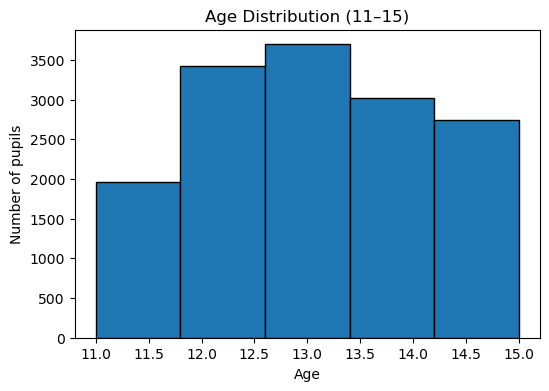

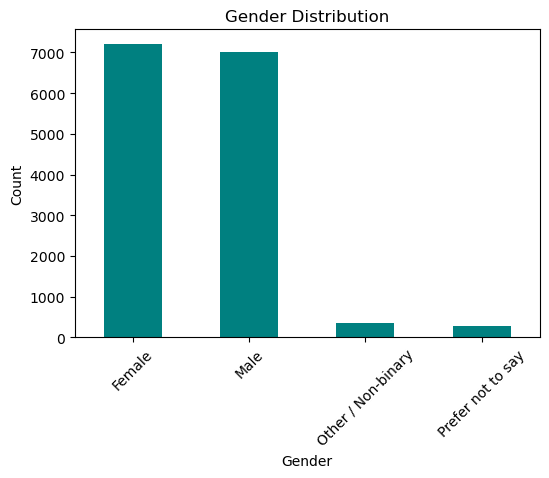

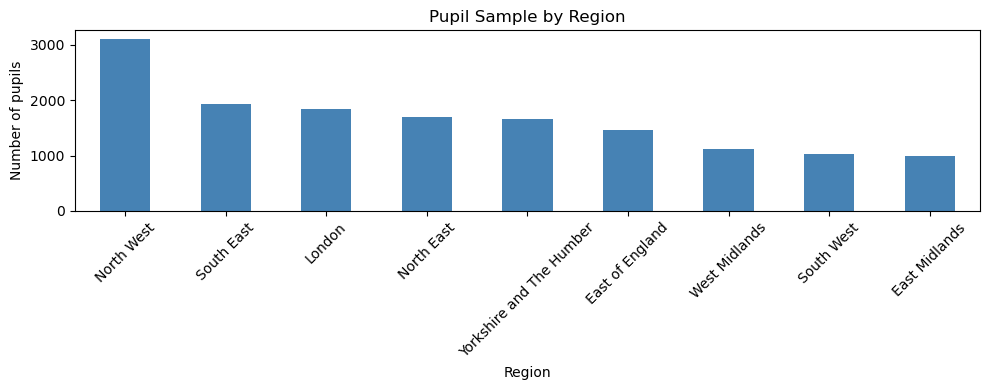

In [16]:
##step7 -- EDA 


# ====================================================
# 7A DEMOGRAPHIC DISTRIBUTIONS
# ====================================================

# --- Age ---
plt.figure(figsize=(6,4))
pupil_merged["age_clean"].dropna().plot(kind="hist", bins=5, edgecolor="black")
plt.title("Age Distribution (11–15)")
plt.xlabel("Age")
plt.ylabel("Number of pupils")
plt.show()

# --- Gender ---
plt.figure(figsize=(6,4))
pupil_merged["gender_label"].value_counts().plot(kind="bar", color="teal", rot=45)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# --- Region sample size ---
plt.figure(figsize=(10,4))
pupil_merged["region_name"].value_counts().plot(kind="bar", color="steelblue", rot=45)
plt.title("Pupil Sample by Region")
plt.xlabel("Region")
plt.ylabel("Number of pupils")
plt.tight_layout()
plt.show()



Overall behaviour prevalence (share of '1's):


lssmk    0.675384
lsalc    0.657859
lsdrg    0.684753
dtype: float64

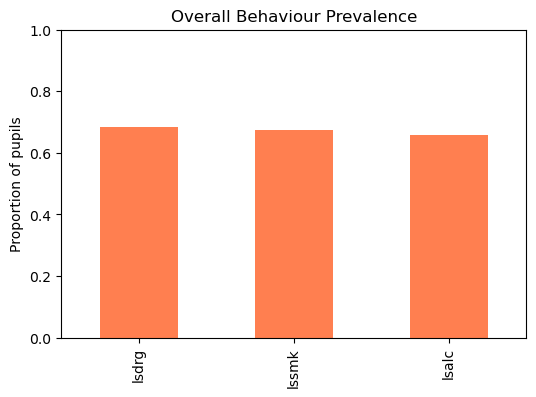


Behaviour prevalence by gender:


,lssmk,lsalc,lsdrg
gender_label,,,
Female,0.693866,0.668748,0.696642
Male,0.658533,0.648830,0.673516
Other / Non-binary,0.631884,0.640580,0.666667
Prefer not to say,0.675090,0.624549,0.682310


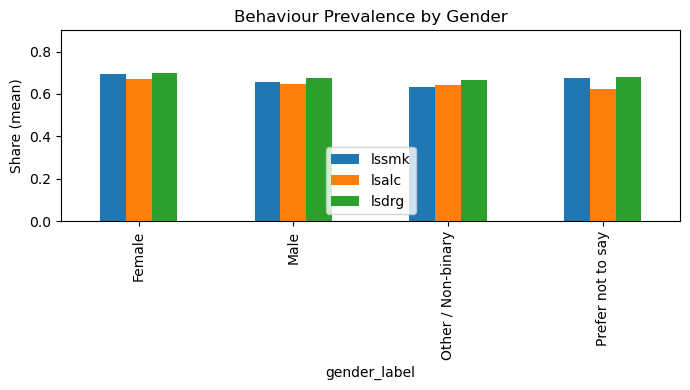

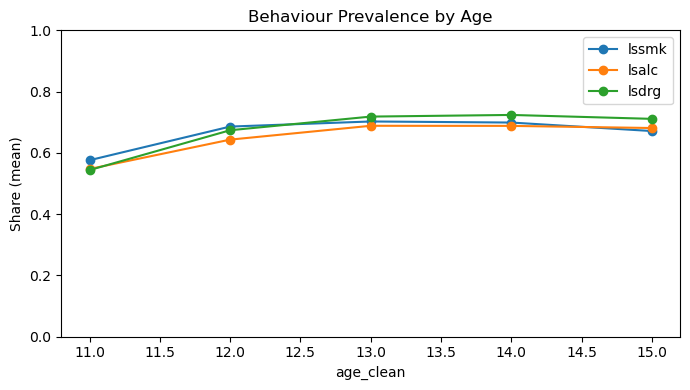

In [17]:
# ====================================================
# 7B BEHAVIOUR PREVALENCE
# ====================================================
beh_cols = [c for c in ["lssmk", "lsalc", "lsdrg"] if c in pupil_merged.columns]

# --- Overall prevalence ---
prev_overall = pupil_merged[beh_cols].mean()
print("\nOverall behaviour prevalence (share of '1's):")
display(prev_overall)

plt.figure(figsize=(6,4))
prev_overall.sort_values(ascending=False).plot(kind="bar", color="coral")
plt.title("Overall Behaviour Prevalence")
plt.ylabel("Proportion of pupils")
plt.ylim(0,1)
plt.show()

# --- By gender ---
if "gender_label" in pupil_merged:
    prev_gender = pupil_merged.groupby("gender_label")[beh_cols].mean()
    print("\nBehaviour prevalence by gender:")
    display(prev_gender)

    prev_gender.plot(kind="bar", figsize=(7,4))
    plt.title("Behaviour Prevalence by Gender")
    plt.ylabel("Share (mean)")
    plt.ylim(0,0.90)
    plt.tight_layout()
    plt.show()

# --- By age ---
prev_age = pupil_merged.groupby("age_clean")[beh_cols].mean()
prev_age.plot(marker="o", figsize=(7,4))
plt.title("Behaviour Prevalence by Age")
plt.ylabel("Share (mean)")
plt.ylim(0,1)
plt.tight_layout()
plt.show()



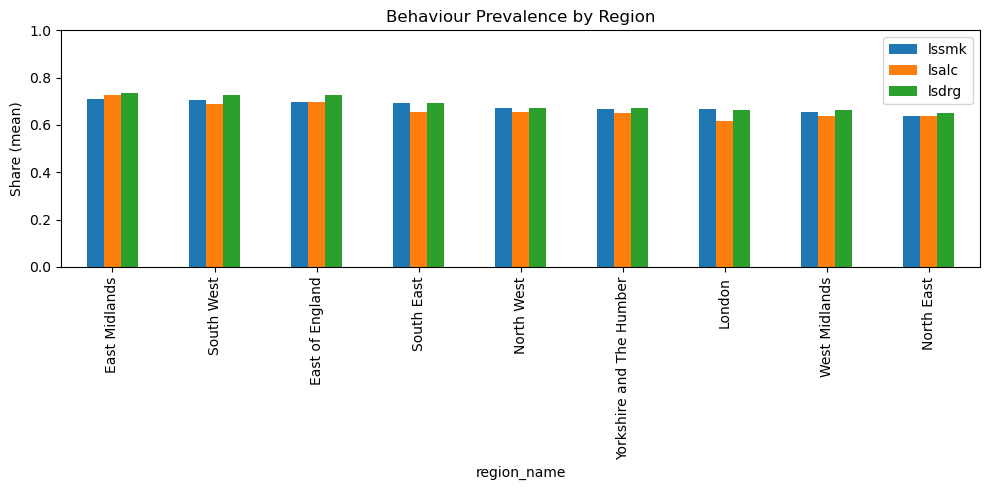

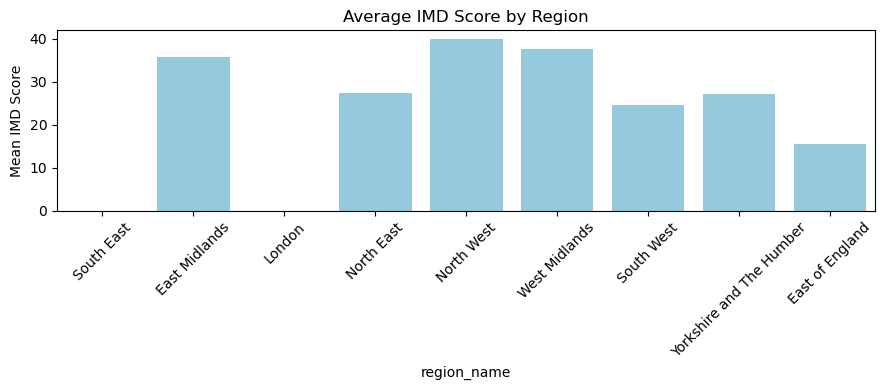

In [18]:
# ====================================================
# 7C REGIONAL COMPARISONS
# ====================================================

# --- Behaviour prevalence by region ---
prev_region = pupil_merged.groupby("region_name")[beh_cols].mean().sort_values(by="lssmk", ascending=False)
prev_region.plot(kind="bar", figsize=(10,5))
plt.title("Behaviour Prevalence by Region")
plt.ylabel("Share (mean)")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

# --- IMD score by region ---
plt.figure(figsize=(9,4))
sns.barplot(data=pupil_merged.drop_duplicates("region_name"),
            x="region_name", y="mean_imd_score", color="skyblue")
plt.xticks(rotation=45)
plt.title("Average IMD Score by Region")
plt.ylabel("Mean IMD Score")
plt.tight_layout()
plt.show()


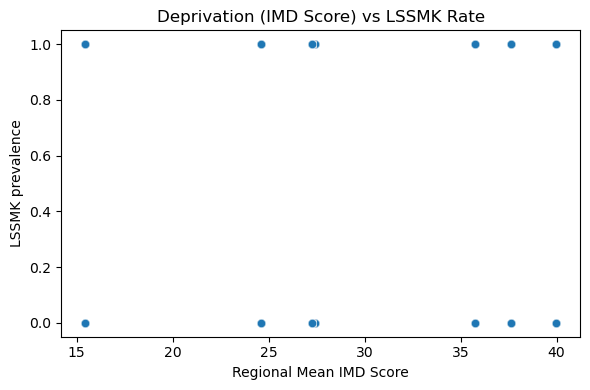

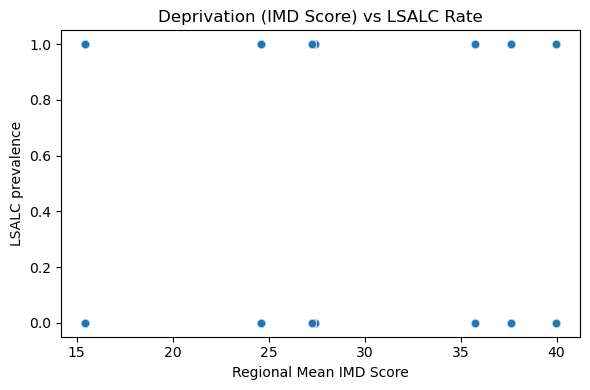

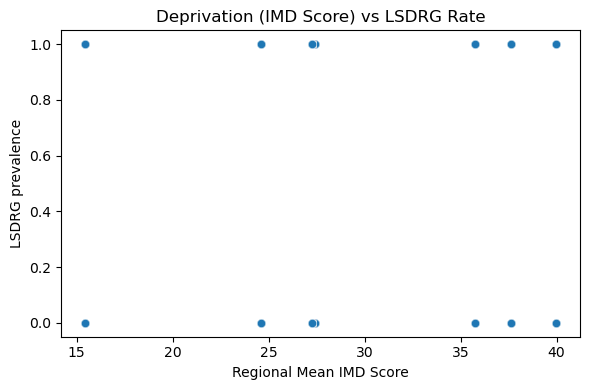

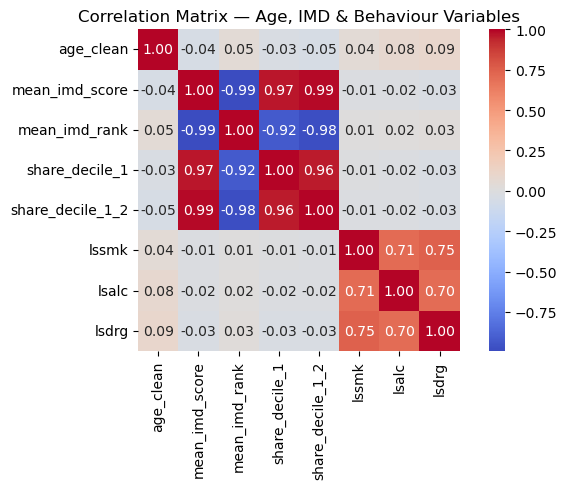

In [20]:

# ====================================================
# 7D RELATIONSHIP: DEPRIVATION VS BEHAVIOURS
# ====================================================

for col in beh_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="mean_imd_score", y=col, data=pupil_merged, alpha=0.4)
    plt.title(f"Deprivation (IMD Score) vs {col.upper()} Rate")
    plt.xlabel("Regional Mean IMD Score")
    plt.ylabel(f"{col.upper()} prevalence")
    plt.tight_layout()
    plt.show()

# ============================= =======================
# 7E CORRELATION HEATMAP
# ====================================================

corr_cols = ["age_clean", "mean_imd_score", "mean_imd_rank", "share_decile_1", "share_decile_1_2"] + beh_cols
corr = pupil_merged[corr_cols].corr(numeric_only=True)
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix — Age, IMD & Behaviour Variables")
plt.tight_layout()
plt.show()

